# Programming Language HW2

爬蟲分析-找出發佈論文數&co-author及co-work數量

# Question 1

找出某author每年的發佈論文數

In [1]:
#import libraries
import urllib.request
import re
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# get paper number of the author
# however it counts something with middle name
# we need this number in searching papers
# need to get actual number in getPaperResult
def getPaperNumber(author):
    url = "https://arxiv.org/search/?query=" + author.replace(" ","+") + "&searchtype=author"
    content=urllib.request.urlopen(url)
    html_str=content.read().decode('utf-8')
    result=html_str.split("title is-clearfix")[1].split(" results")[0].split("of ")[1]
    
    return int(result.replace(',', ''))

In [3]:
#used to verify this paper is created by author
def verifyAuthor(element,author):
    if(author in element):
        return True
    return False

In [4]:
#get actual result of author's paper
def getPaperResult(author):
    number =getPaperNumber(author)
    counter=0
    for i in range(int(number/200)+1):
        url = "https://arxiv.org/search/?query=" + author.replace(" ","+") + "&searchtype=author&size=200&start="+ str(200*i)        
        content=urllib.request.urlopen(url)
        html_str=content.read().decode('utf-8')
        result=html_str.split("<li class=\"arxiv-result\">")

        for r in range(1,len(result)):
            if(verifyAuthor(result[r],author)):
                counter=counter+1
    
    return counter
        

In [5]:
# get year of each paper
def getPaperYear(author):
    
    number =getPaperNumber(author)
    counter=getPaperResult(author)
    print("This author has " + str(counter) + " papers")
    yearList=[]
    
    for i in range(int(number/200)+1):
        url = "https://arxiv.org/search/?query=" + author.replace(" ","+") + "&searchtype=author&size=200&start="+ str(200*i)        
        content=urllib.request.urlopen(url)
        html_str=content.read().decode('utf-8')
        result=html_str.split("<li class=\"arxiv-result\">")

        for r in range(1,len(result)):
            if(verifyAuthor(result[r],author)):
                title=result[r].split("<p class=\"is-size-7\"")[1].split(",")[1].split(";")[0]
                yearList.append(int(title))
    
    df = pd.DataFrame(yearList) 
    x=df[0].value_counts().index.tolist()
    y=df[0].value_counts().values.tolist()
    return x,y

This author has 47 papers


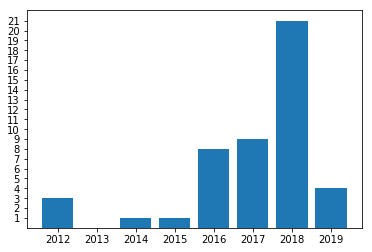

This author has 17 papers


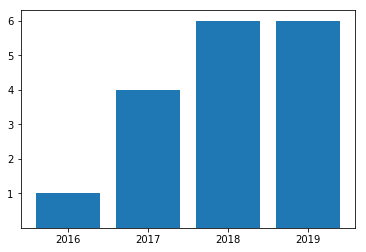

In [8]:
author= "Ian Goodfellow"
# not Goodfellow, I
x,y= getPaperYear(author)
plt.bar(x,y)
yint=range(min(y),max(y)+1)
plt.yticks(yint)
xint=range(min(x),max(x)+1)
plt.xticks(xint)
plt.show()

# give name like this
author="Nicholas Carlini"
# not Carlini, N even those two is the same person
x,y= getPaperYear(author)
plt.bar(x,y)
yint=range(min(y),max(y)+1)
plt.yticks(yint)
xint=range(min(x),max(x)+1)
plt.xticks(xint)
plt.show()

# Question 2
找出paper的co-author及co-work次數

In [86]:
# get co-worker of all papers
def getPaperAuthor(author):

    number =getPaperNumber(author)
    counter=getPaperResult(author)
    print("This author has " + str(counter) + " papers")
    authorList=[]
    
    for i in range(int(number/200)+1):
        url = "https://arxiv.org/search/?query=" + author.replace(" ","+") + "&searchtype=author&size=200&start="+ str(200*i)
        content=urllib.request.urlopen(url)
        html_str=content.read().decode('utf-8')
        result=html_str.split("<li class=\"arxiv-result\">")
        
        for r in range(1,len(result)):
            authors=result[r].split("Authors:</span>")[1].split("</p")[0]
            # verify author is in this paper or not
            if(verifyAuthor(authors,author)):
                string=authors.split("</a>")
                for r2 in range(0,len(string)-1):
                    coauthor=string[r2].split(">")[1]
                    # we are calculating co-author, therefore do not include author him/herself
                    if(coauthor!=author):
                        authorList.append(coauthor)

    df = pd.DataFrame(authorList)
    s=df[0].value_counts().sort_index(ascending=True)
    
    return s

In [87]:
author= "Ian Goodfellow"

result=getPaperAuthor(author)
for i, v in result.items():
    print("["+ str(i) +"]: "+ str(v) + " times")
    
author="Nicholas Carlini"

result=getPaperAuthor(author)

for i, v in result.items():
    print("["+ str(i) +"]: "+ str(v) + " times")

This author has 47 papers
[Aaron Courville]: 2 times
[Abhibhav Garg]: 1 times
[Alan Yuille]: 1 times
[Alec Radford]: 1 times
[Aleksander Madry]: 1 times
[Alex Kurakin]: 1 times
[Alexander Matyasko]: 1 times
[Alexey Kurakin]: 7 times
[Alireza Makhzani]: 1 times
[Ananthram Swami]: 1 times
[Andrew Harp]: 1 times
[Andrew M. Dai]: 3 times
[Andy Chu]: 1 times
[Andy Davis]: 1 times
[Anish Athalye]: 1 times
[Arnaud Bergeron]: 1 times
[Ashish Agarwal]: 1 times
[Augustus Odena]: 5 times
[Aurko Roy]: 2 times
[Balaji Lakshminarayanan]: 1 times
[Been Kim]: 2 times
[Brendan Frey]: 1 times
[Brian Cheung]: 1 times
[Catherine Olsson]: 4 times
[Chelsea Finn]: 1 times
[Chiyuan Zhang]: 1 times
[Chris Olah]: 1 times
[Christian Szegedy]: 1 times
[Christopher Olah]: 1 times
[Cihang Xie]: 2 times
[Colin Raffel]: 3 times
[Craig Citro]: 1 times
[Dan Boneh]: 2 times
[Dan Mane]: 1 times
[David Andersen]: 1 times
[David Berthelot]: 2 times
[David Warde-Farley]: 1 times
[Derek Murray]: 1 times
[Dimitris Metaxas]: 1